In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

In [3]:
#size of the training data set
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0] # is the first index position

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]


9

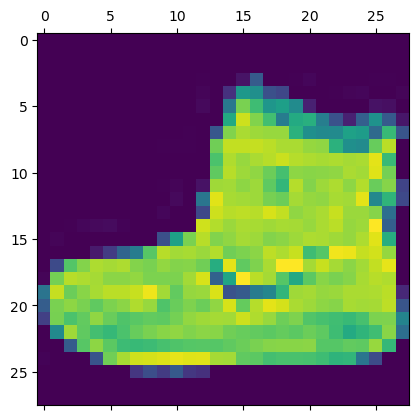

In [6]:
plt.matshow(X_train[0])


In [7]:
#Normalize training data before training the neural net
X_train = X_train/255
X_test = X_test/255


In [8]:
#Now build the Sequential Model and add layers into it
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compiling the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [11]:
model.fit(X_train, y_train)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5033 - accuracy: 0.8230


In [12]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.8438


[0.44161590933799744, 0.8438000082969666]

In [13]:
#Above shows accuracy score of 86.40 %. The first parameter is loss


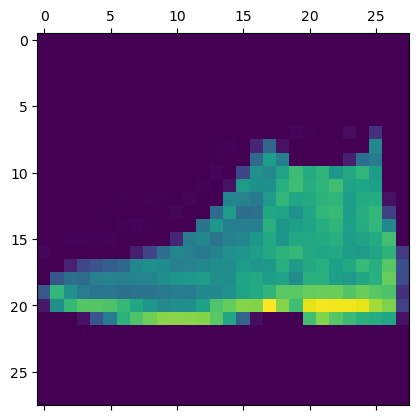

In [14]:
plt.matshow(X_test[0])


In [15]:
yp = model.predict(X_test)


313/313 [==============================] - 1s 1ms/step


In [16]:
np.argmax(yp[0])


9

In [17]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

class_labels[np.argmax(yp[0])]


'Ankle boot'

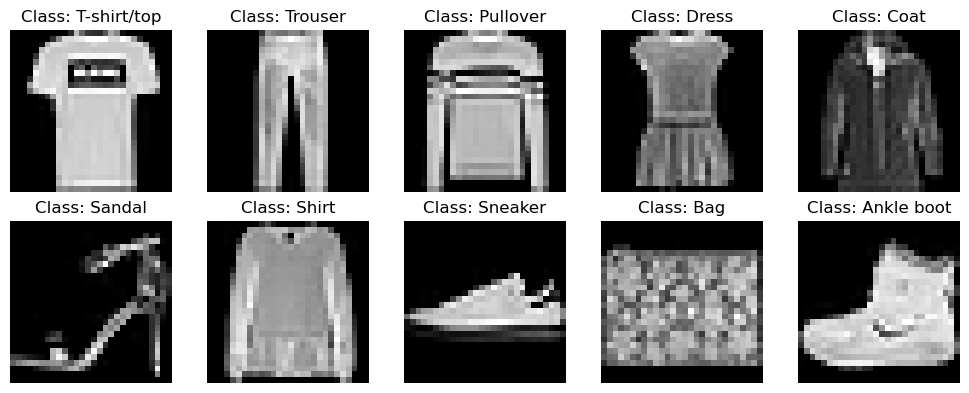

In [18]:

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels[i]))
    plt.axis('off')
    
plt.tight_layout()

In [19]:
#Now build the Sequential Model and dropout layers
from tensorflow.keras.layers import Dropout
model = Sequential([
    Flatten(input_shape=(28,28)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(256, activation='sigmoid'), # dense layer 1
    Dropout(0.2), # DropOut 20% on dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dropout(0.1), # DropOut 10% on dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

In [20]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)] # Early Stopping
history=model.fit(X_train, y_train, epochs=100, 
          batch_size=2000, validation_split = 0.2, callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - 2s 48ms/step - loss: 2.0683 - accuracy: 0.3226 - val_loss: 1.6153 - val_accuracy: 0.6246
Epoch 2/100
24/24 [==============================] - 1s 40ms/step - loss: 1.3694 - accuracy: 0.5951 - val_loss: 1.0816 - val_accuracy: 0.7048
Epoch 3/100
24/24 [==============================] - 1s 42ms/step - loss: 0.9912 - accuracy: 0.6770 - val_loss: 0.8308 - val_accuracy: 0.7426
Epoch 4/100
24/24 [==============================] - 1s 40ms/step - loss: 0.8078 - accuracy: 0.7251 - val_loss: 0.7067 - val_accuracy: 0.7610
Epoch 5/100
24/24 [==============================] - 1s 42ms/step - loss: 0.7026 - accuracy: 0.7550 - val_loss: 0.6316 - val_accuracy: 0.7767
Epoch 6/100
24/24 [==============================] - 1s 42ms/step - loss: 0.6387 - accuracy: 0.7757 - val_loss: 0.5784 - val_accuracy: 0.7982
Epoch 7/100
24/24 [==============================] - 1s 44ms/step - loss: 0.5910 - accuracy: 0.7918 - val_loss: 0.5403 - val_accuracy: 0.8092
Epoch 

In [22]:
results = model.evaluate(X_test,  y_test, verbose = 0)


In [23]:
####test accuracy
print('test loss, test acc:', results)


test loss, test acc: [0.3618655204772949, 0.8702999949455261]


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in yp]
print(Y_pred_labels)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 7, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 4, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 6, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 4, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 4, 8, 5, 4, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 4, 6, 4, 9, 7, 6, 5, 5, 4, 8, 5, 6, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4, 0, 1, 2, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 2, 4, 7, 1, 6, 4, 0, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

In [25]:
####printing confusion matrix
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[753   4   8  39  11   1 170   0  13   1]
 [  4 956   4  24   7   0   5   0   0   0]
 [  9   3 646   6 239   1  93   0   3   0]
 [ 34  12   7 816  88   1  37   0   5   0]
 [  0   0  51  11 892   1  42   0   3   0]
 [  0   1   0   0   0 958   0  30   2   9]
 [ 98   1  71  26 181   0 611   0  12   0]
 [  0   0   0   0   0  47   0 934   0  19]
 [  2   1   3   3   8   6  19   5 953   0]
 [  0   0   0   0   0  16   1  64   0 919]], shape=(10, 10), dtype=int32)


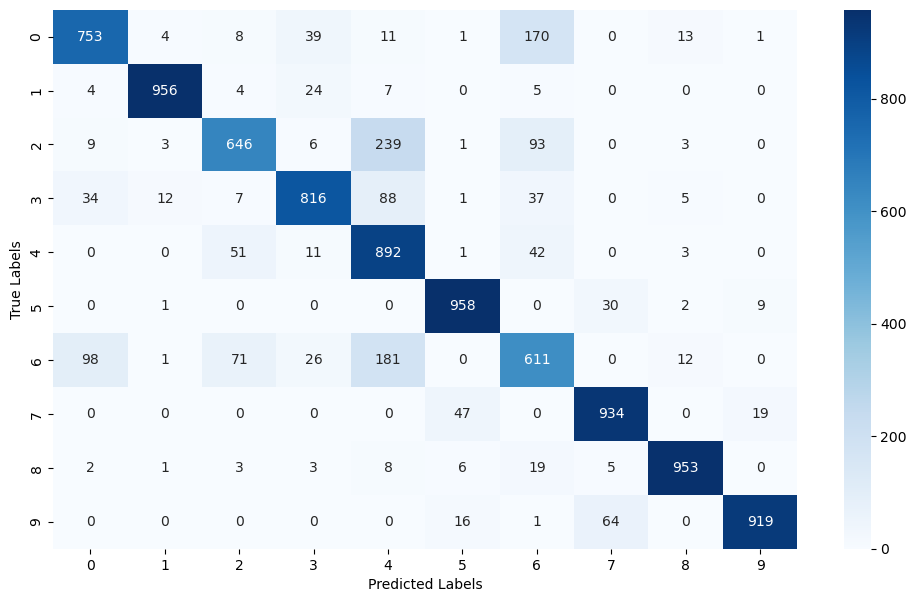

In [27]:
#heatmap
import seaborn as sns

plt.figure(figsize=(12,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [28]:
#print dict_keys
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

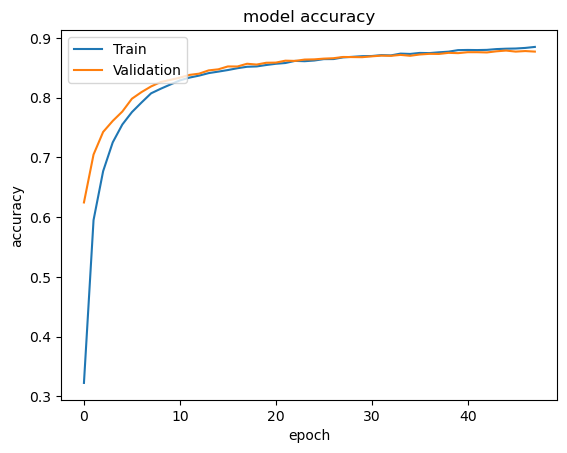

In [29]:
#####printing model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

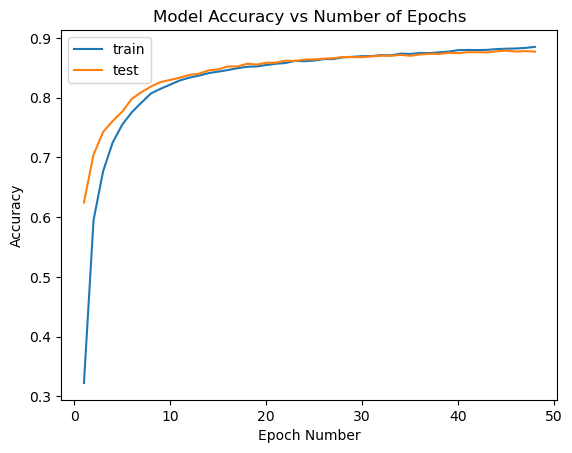

In [33]:
###print'Model Accuracy vs Number of Epochs'
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [34]:
#####Best Accuracy score
best_score = max(history.history['val_accuracy'])
best_epoch = np.array(history.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.878750 at epoch 45


In [35]:
########Classification Report
from sklearn.metrics import classification_report, confusion_matrix
target_names = [class_labels[x] for x in range(0,10)]
print(classification_report(y_test, Y_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.75      0.79      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.82      0.65      0.72      1000
       Dress       0.88      0.82      0.85      1000
        Coat       0.63      0.89      0.74      1000
      Sandal       0.93      0.96      0.94      1000
       Shirt       0.62      0.61      0.62      1000
     Sneaker       0.90      0.93      0.92      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.97      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

